<br><br><br>
# 0. Set up

Prior to Python, I had only used R, so I was surprised to learn that you need to import libraries for routine tasks like handling a dataframe, doing vectorized math, and data visualization. This is what we are doing below.

In [3]:
# Standard data science libraries
# Used for dataframes
import pandas as pd
# Used for doing math
import numpy as np
# Used for visualization
import matplotlib.pyplot as plt

# Making the plot show within our notebook
%matplotlib inline

# Allowing us to set the plot size
import pylab
pylab.rcParams['figure.figsize'] = (10, 10)

<br><br><br>
# 1. Data Import

Now that we have our standard data libraries imported, let's import some actual data.

## 1.1 Storm Events background information

The following data is the Storm Events 2016 data. Storm Event is a NOAA-sponsored data set that tries to record major weather events and their social impacts. It started in the 1950s as a tornado data set, but has since expanded to nearly every kind of event imaginable, from freezing fog to heat waves to hurricanes.

Although Storm Events has 10s of traditional columns (such as lat, lon, and date), it also contains narratives columns; columns which contain text descriptions of that row's specific event.

In this lesson we'll be using this narrative column to predict the EF (enhance Fujita) scale of tornadoes.

## 1.2. Importing and viewing a .csv file

One thing that is important to know (for non-Python users), is that most popular Python libraries have functions which aid in data science. This functions generally creation objects (just as in R) and these objects generally have many methods (not like R). Methods are somewhat internal ways of manipulating an object and these are used in the following way: `object.method()` where sometimes you need the parentheses, sometimes you don't; this will generally be obvious through simple trial and error.

In [4]:
# The equivalent of R's read.csv() - read in the csv file
Storm_Events_2016 = pd.read_csv('/home/jeremydiaz/tornadoesr/data/raw/StormEvents_details-ftp_v1.0_d2016_c20171116.csv.gz')

# The equivalent of R's head() - display the first x rows of a data set
Storm_Events_2016.head(3)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201607,15,1715,201607,15,1715,108769,651823,SOUTH CAROLINA,45,...,1.0,N,BOYD HILL,34.94,-81.03,34.94,-81.03,Scattered thunderstorms developed across the U...,One to two feet of deep standing water develop...,CSV
1,201607,15,1725,201607,15,1725,108769,651825,SOUTH CAROLINA,45,...,1.0,S,FT MILL,35.01,-80.93,35.01,-80.93,Scattered thunderstorms developed across the U...,NWS Columbia relayed a report of trees blown d...,CSV
2,201607,16,1246,201607,16,1246,108812,651828,NORTH CAROLINA,37,...,2.0,ENE,OLD FT,35.64,-82.14,35.64,-82.14,Scattered thunderstorms developed near the Blu...,Media reported two trees blown down along I-40...,CSV


<br><br><br>
# 2. Basic data set exploration

Now that we have the data imported, let's inspect it a little.

## 2.1 Viewing data set characteristics (columns and size)

This notebook cell prints the columns within the data set. Notice the above method required parentheses while the one below did not

In [5]:
# The equivalent of R's colnames() - view the data set's columns
Storm_Events_2016.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

This notebook cell prints the `(rows, columns)` of the data set

In [6]:
# The equivalent of R's dim() - view the size of the data set
Storm_Events_2016.shape

(55964, 51)

# 2.2.0. Inspecting a (categorical) column

Remember that we are interested in the tornado events, and, surely, there were not 56,000 tornadoes in 2016.

Let's view the breakdown of event types from 2016

In [7]:
Storm_Events_2016['EVENT_TYPE'].value_counts()

Thunderstorm Wind             15657
Hail                           9388
Flash Flood                    3586
High Wind                      3107
Winter Weather                 2916
Winter Storm                   2367
Drought                        2271
Marine Thunderstorm Wind       2173
Heavy Rain                     1795
Flood                          1703
Heavy Snow                     1518
Tornado                        1079
Strong Wind                     902
Frost/Freeze                    832
Dense Fog                       829
Heat                            811
Extreme Cold/Wind Chill         570
High Surf                       568
Excessive Heat                  555
Blizzard                        544
Lightning                       408
Wildfire                        347
Tropical Storm                  319
Funnel Cloud                    289
Lake-Effect Snow                250
Coastal Flood                   223
Waterspout                      199
Cold/Wind Chill             

# 2.2.1 A more readable inspection

This can be made into a more readable data frame by simply using the pandas `DataFrame()` function

In [8]:
events_breakdown = Storm_Events_2016['EVENT_TYPE'].value_counts()

readable_df = pd.DataFrame(events_breakdown)
readable_df

,EVENT_TYPE
Thunderstorm Wind,15657
Hail,9388
Flash Flood,3586
High Wind,3107
Winter Weather,2916
Winter Storm,2367
Drought,2271
Marine Thunderstorm Wind,2173
Heavy Rain,1795
Flood,1703


## 2.3. Additional information: continuous column

The `.value_counts()` method is only helpful for categorical variables. If you want to inspect a continuous column, then you will likely want to view a distribution of the values. This can be done with `matplotlib.pyplot.hist()` or, here, `plt.hist()` (since we important matplotlib.pyplot as plt). This function will be demonstrated later in this notebook.

<br><br><br>
# 3 Data set cleaning

We now know that there are 51 columns and most of those are not tornadoes (which we're interested in), so let's clean this data set up.

## 3.1 Subsetting the data set

First, let's filter the data set to only include tornadoes.

To do this, we will first get a list-like object indicating whether or not the `EVENT_TYPE` is "Tornado".<br>
Then, we will use the resulting `True`s and `False`s to subset the data set rows.

In [9]:
# Getting a list-like object that contains True if the event was a tornado
# and False if it is not a tornado 
tornado_logical = (Storm_Events_2016['EVENT_TYPE'] == 'Tornado')

# Using that list to subset the data set
tornadoes_2016 = Storm_Events_2016[tornado_logical]

# View the first 3 rows
tornadoes_2016.head(3)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
72,201601,21,1614,201601,21,1619,101941,609831,MISSISSIPPI,28,...,1.0,SE,BEECH GROVE,31.9388,-90.2981,31.9662,-90.2578,Abundant moisture and instability combined wit...,This weak tornado touched down along Bennett R...,CSV
73,201601,21,1746,201601,21,1749,101941,609833,MISSISSIPPI,28,...,3.0,NNE,HOMEWOOD,32.2624,-89.5387,32.2645,-89.5030,Abundant moisture and instability combined wit...,This weak tornado snapped a handful of large p...,CSV
89,201607,5,1928,201607,5,1930,107447,644135,MINNESOTA,27,...,4.0,NE,OAK CENTER,44.3935,-92.3456,44.3938,-92.3439,A tornado hit a small part of southeast Minnes...,A short-lived tornado touched down southwest o...,CSV


From the tables we created earlier, we know how many tornadoes there are, so as a sanity check we can confirm that the number of rows in the data set is equal to that number.

In [10]:
tornadoes_2016.shape

(1079, 51)

## 3.2. Additional information: list-like objects

Notice that I called our `tornado_logical` object a "list-like object". There are many list-like objects in python. Three very common ones are:

1. Lists
2. Numpy n-dimensional arrays
3. Pandas series

**Lists** are base-Python objects which are very general and unfascinating; they mostly just *store many things*.

**Numpy n-dimensional arrays** are like lists that you can do *vectorized/matrix math* on.

And **Pandas series** are like numpy arrays that are structed and function with the knowledge that they are a *data set column*.

Let's view what kind of object `tornado_logical` is

In [11]:
# Viewing what type of object tornado_logical is
type(tornado_logical)

pandas.core.series.Series

These three types of objects are interchangable, however if you convert the type, you will also convert it's immediate capabilities (its methods and functions that can act on it).

In [12]:
# Convert the object to a numpy array
tornado_logical_numpy_array = tornado_logical.values

# View its type
type(tornado_logical_numpy_array)

numpy.ndarray

In [13]:
# Convert the object to a list
tornado_logical_list = tornado_logical.values.tolist()

# View its type
type(tornado_logical_list)

list

These each look like...

In [14]:
print('### THE PANDAS SERIES ###')
print(tornado_logical[0:10])

print('\n### THE NUMPY ARRAY ###')
print(tornado_logical_numpy_array[0:10])

print('\n### THE LIST ###')
print(tornado_logical_list[0:10])

### THE PANDAS SERIES ###
0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: EVENT_TYPE, dtype: bool

### THE NUMPY ARRAY ###
[False False False False False False False False False False]

### THE LIST ###
[False, False, False, False, False, False, False, False, False, False]


More thoroughly:
1. The `pd.DataFrame()` function will convert a list or ndarray into a one-column data set 
2. The `np.asarray()` function will convert a list into a ndarray
3. The `.values()` method will convert a pandas column/Series into a ndarray
4. The `.tolist()` method will convert a ndarray object into a list

Remember the different between functions and methods!

1. `function(object)`
2. `object.method()`

## 3.3. Getting and viewing our text data

Here, we will get a random row from the data set, retrieve its text column entry, and view what the it contains.

The `.item()` is a very popular way of retrieving single values out of a one-value, list-like object

*Additional information*: Storm Events actually has two different text columns: `EVENT_NARRATIVE` and `EPISODE_NARRATIVE`. An `EVENT` can be one part of an `EPISODE`. For example, a tornado, some flooding, and hail damage can all be events spawning from a larger storm "episode".

In [15]:
# Store a random row from the total data set
random_row = tornadoes_2016.sample()

# Get the column storing a text description of the random storm event
random_rows_event_text = random_row['EVENT_NARRATIVE']

# Turn that list-like object into just the value within it that we're interested in
random_rows_event_text_plain = random_rows_event_text.item()

random_rows_event_text_plain

'Cone tornado reported which quickly became rain wrapped. No damage was observed do to location in open grasslands and therefore a rating is not possible with this tornado.'

Now we are familiar with how we can access the text data for later. Now onto the...

## 3.4. EF-scale processing

Let's start off by viewing the distribution of EF-scales in 2016; these are stored in the `TOR_F_SCALE` column. Note that this is the same method (`.value_counts()`) that we used to view the breakdown of 2016 `EVENT_TYPE`s

In [16]:
pd.DataFrame(tornadoes_2016['TOR_F_SCALE'].value_counts())

,TOR_F_SCALE
EF0,570
EF1,357
EF2,92
EFU,31
EF3,27
EF4,2


We can also view this as a histogram. `Matplotlib`'s histograms may be strangely alligned without some modification to the histogram bins. As shown below

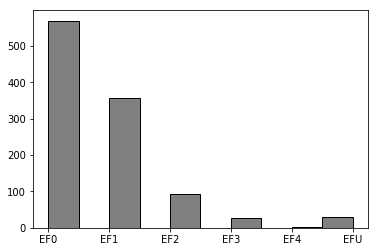

In [17]:
plt.hist(tornadoes_2016['TOR_F_SCALE'], color = 'grey', edgecolor = 'black');

We can fix this with `numpy`'s `arange` function. This is similar to R's `seq()` function, but remember that python has a habit of not including the final value with both normal indexing and with this `arange` function.

In [18]:
fixed_bins = np.arange(-0.5, 6.5, 1)
fixed_bins

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5])

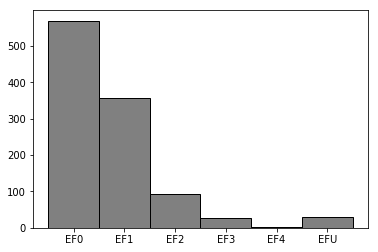

In [19]:
plt.hist(tornadoes_2016['TOR_F_SCALE'], bins = fixed_bins, color = 'grey', edgecolor = 'black');

Now for the actual processing!<br>
EFU tornadoes are tornadoes with unknown damage/windspeeds. For our purposes, we'll assume that a tornado with unknown damage likely caused no damage - grouping it with EF0 tornadoes.<br>
So, we're going to group EFU and EF0 tornadoes together as "non-damaging" tornadoes, and all other EF ratings as "damaging" tornadoes. As a result, down the road, we will have a **binary (0 or 1) classification** problem.<br><br>
Here's a simple example of how we'll do this

In [20]:
# Storing a test value
test_value = 'EF1'

# Creating a logical value (True or False) based on whether or not our value is in the list
is_in = (test_value in ['EFU', 'EF0'])

# Turning that logical value into an integer/number
is_in_integer = int(is_in)

# Viewing that number
is_in_integer

0

Now, we simply have to scale that up for all our rows

In [25]:
binary_EF_values = []

# For each EF-rating
for EF_rating in tornadoes_2016['TOR_F_SCALE'].values:
    
    # Determine if it is an EFU or EF0
    is_in = (EF_rating in ['EF1', 'EF2', 'EF3', 'EF4', 'EF5'])
    
    # Convert that logical value to a numeric value
    is_in_integer = int(is_in)
    
    # Adding that numeric value to our newly created, running list
    binary_EF_values.append(is_in_integer)

And now let's store these values as a new column and view their counts.

*WARNING*: the following code with return a **SettingWithCopyWarning**. This is simply Pandas expressing it's anger at our inperfect yet readable syntax (it would prefer us to index with their `.loc` method). Since `tornadoes_2016` is already indexed, Pandas is mad that we're further indexing an index, rather than using their `.loc` method which is designed to handle multiple-condition indexing. In the end, this is a *Warning* (notification to possibly unintended actions/consequences) rather than an *Error* (failure to execute), and the result works for our purposes.

In [26]:
# Storing our list as a newly named column within our DataFrame
tornadoes_2016['BINARY_EF'] = binary_EF_values

# Creating a nice table view of the counts of each value (0 or 1)
pd.DataFrame(tornadoes_2016.BINARY_EF.value_counts())

,BINARY_EF
0,601
1,478


## 3.5 Putting that all together

We took a teaching-road to get to this point in our data. It is worth noting that this can all be done fairly compactly and in only one notebook cell!

So, in this next cell we will:
1. Import the 2016 Storm Events data
2. Subset that data to only tornadoes
3. Keep only the EF-scale and event narrative columns
4. Reset the index
5. Convert the EF-scale values to binary (1 if EFU or EF0, 0 otherwise)
6. Replace the EF-scale column with our binary values
7. View the first 10 rows

In [27]:
# Import the data
Storm_Events_2016 = pd.read_csv('/home/jeremydiaz/tornadoesr/data/raw/StormEvents_details-ftp_v1.0_d2016_c20171116.csv.gz')

# Get only the tornadoes
Tornadoes_2016 = Storm_Events_2016[Storm_Events_2016['EVENT_TYPE'] == 'Tornado']

# Keep only the F-scale and text description of each tornado
Tornadoes_2016_column_subsetted = Tornadoes_2016[['TOR_F_SCALE', 'EVENT_NARRATIVE']]

# Reset the dataframe's index
Tornadoes_2016_column_subsetted = Tornadoes_2016_column_subsetted.reset_index(drop = True)

# Converting the EF values to binary
binary_EF_values = []
# For each EF-rating
for EF_rating in Tornadoes_2016_column_subsetted['TOR_F_SCALE'].values:
    
    # Determine if it is an "non-damaging" or "damaging" tornado
    is_in = (EF_rating in ['EF1', 'EF2', 'EF3', 'EF4', 'EF5'])
    
    # Convert that logical value to a numeric value
    is_in_integer = int(is_in)
    
    # Adding that numeric value to our newly created, running list
    binary_EF_values.append(is_in_integer)
    
# Swapping out the multiple category TOR_F_SCALE column for the binary BINARY_EF
Tornadoes_2016_column_subsetted['TOR_F_SCALE'] = binary_EF_values

# View the first 10 rows
Tornadoes_2016_column_subsetted.head(10)

,TOR_F_SCALE,EVENT_NARRATIVE
0,0,This weak tornado touched down along Bennett R...
1,0,This weak tornado snapped a handful of large p...
2,1,A short-lived tornado touched down southwest o...
3,0,A brief tornado damaged a small shed.
4,1,The tornado touched down southeast of Whigham ...
5,0,A landspout tornado touched down in open count...
6,0,A landspout tornado touched down in open count...
7,1,This tornado began around Grimsley Road with t...
8,1,Damage along this path was primarily to pine a...
9,1,This tornado touched down briefly at this loca...


<br><br><br>
# 4. Text processing

Now, we have the two columns that we're interested in:
1. Whether the tornado was an EFU or EF0 ("non-damaging")
2. The text describing the tornado

But, we have to actually make the text usable in a standard model (in this case, logistic regression). The easiest way to do this is through a "one-hot encoding", where we assign counts based on word presence. For example, if we had the following two sentences:
1. Hi, my name is Jeremy
2. Hi, my name is X

We could then create a standard format to represent the counts as:
1. `[1, 1, 1, 1, 1, 0]`
2. `[1, 1, 1, 1, 0, 1]`

Where the arrays represent the counts for `[Hi, my, name, is, Jeremy, X]`. This particular method goes by many names: bag of words, one-hot encodings, unigram counts, sparse count representation, etc... For our purposes, I will often stick to "bag of words".

<br>It may be worth stating that the values are not limitted to 1 or 0, we could have a sentence such as:
1. "I'm all about that bass, bout that bass, bout that bass"

Which would be represented (in the format of `[I'm, all, about, that, bass, bout]`) as:
1. `[1, 1, 1, 3, 3, 2]`

<br> As usual, sklearn has a function to easily convert text into bag of words representations. Here we are importing that function.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

Now that we have the python-ic ability to create bag of words, let's prove my examples

In [38]:
bag_of_words_izer = CountVectorizer(ngram_range = (1, 1))
bag_of_words = bag_of_words_izer.fit_transform(["Hi, my name is Jeremy",
                                                "Hi, my name is Bob"])
bag_of_words.todense()

matrix([[0, 1, 1, 1, 1, 1],
        [1, 1, 1, 0, 1, 1]], dtype=int64)

In [42]:
bag_of_words_izer.vocabulary_

{'hi': 1, 'my': 4, 'name': 5, 'is': 2, 'jeremy': 3, 'bob': 0}

In [ ]:
from sklearn.model_selection import train_test_split

In [32]:
train_df, test_df = train_test_split(Tornadoes_2016_column_subsetted, test_size = 0.2)

In [33]:
train_descriptions = train_df['EVENT_NARRATIVE'].values
train_descriptions[0]

'A small but intense tornado touched down and caused significant damage to a pole shed.  The tornado lifted the entire shed and destroyed it. Debris from this shed traveled around 1 mile to the southeast from where the tornado first struck it. Only minor structural damage occurred elsewhere on the farm.'

In [25]:
descrip_to_numbers = CountVectorizer()
bag_of_words = descrip_to_numbers.fit(train_descriptions)
bag_of_words

<1079x4821 sparse matrix of type '<class 'numpy.int64'>'
	with 51650 stored elements in Compressed Sparse Row format>

In [26]:
bag_of_words.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Code

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
x = bag_of_words
y = Tornadoes_2016_column_subsetted['F_binary'].values

In [29]:
model = LogisticRegression()
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
predictions = model.predict(x)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
accuracy_score(y, predictions)

0.9962928637627433

In [33]:
confusion_matrix(y, predictions)

array([[600,   1],
       [  3, 475]])

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>